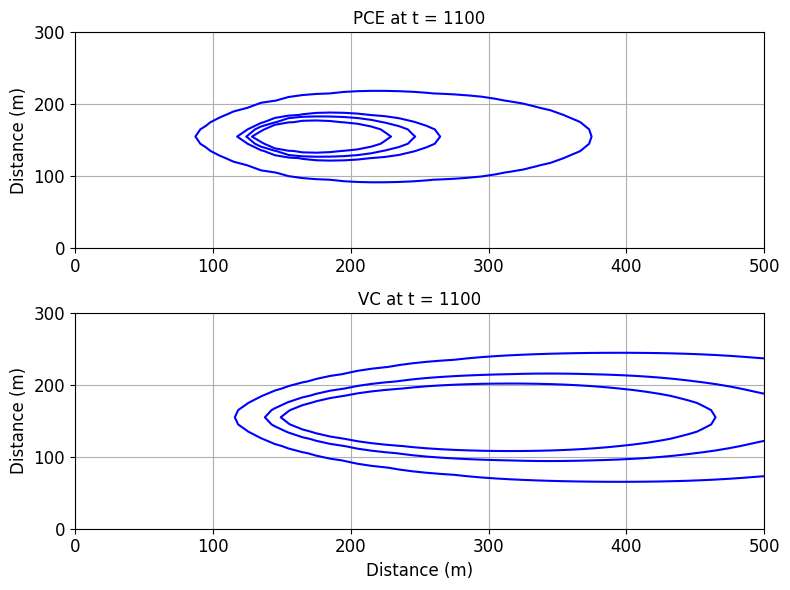

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ——— 1. 加载并换算单位 ———
# data 的 shape = (ntime, nspecies=2, nrow=31, ncol=51)
data = np.load("./output/PHT3D_CASE_8/PHT3D_CASE_8_results.npy").reshape(-1, 4, 31, 51)

# 物种顺序假定为 [0]=PCE, [1]=VC；与前面乘数一致
# 1000 用于单位换算，其它为摩尔质量或经验系数
PCE = data[:, 0, :, :] * 1000 * 165.8    # shape -> (55, 31, 51)
VC  = data[:, 1, :, :] * 1000 * 62.45    # shape -> (55, 31, 51)
Cl  = data[:, 2, :, :]
Na  = data[:, 3, :, :]


# ——— 2. 网格和时间步设置 ———
nrow, ncol = 31, 51
ncells = nrow * ncol
dt = 20  # 时间步长
ntime = PCE.shape[0]
times = np.arange(0, ntime * dt, dt)  # [0, 20, 40, ..., (ntime-1)*dt]

# ——— 3. 构造空间坐标 ———
x = np.arange(5, 5 + 10 * ncol, 10)   # 5,15,...,505
y = np.arange(5, 5 + 10 * nrow, 10)   # 5,15,...,305
X, Y = np.meshgrid(x, y)

# ——— 4. 等高线级别 ———
levels_PCE = [0.01,   0.5, 1, 2]
levels_VC  = [0.1, 0.5, 1.0]

# ——— 5. 绘图 ———
target_time = 1100  # 可以改为你关心的任意时间点
plt.figure(figsize=(8, 6))

for idx, t in enumerate(times):
    if t == target_time:
        plt.clf()
        # PCE 子图
        plt.subplot(2, 1, 1)
        plt.contour(X, Y, PCE[idx], levels_PCE, colors='b')
        plt.axis([0, 500, 0, 300])
        plt.grid(True)
        plt.xticks(fontsize=12)
        plt.yticks([0,100,200,300], fontsize=12)
        plt.ylabel('Distance (m)', fontsize=12)
        plt.title(f'PCE at t = {t}', fontsize=12)

        # VC 子图
        plt.subplot(2, 1, 2)
        plt.contour(X, Y, VC[idx], levels_VC, colors='b')
        plt.axis([0, 500, 0, 300])
        plt.grid(True)
        plt.xticks(fontsize=12)
        plt.yticks([0,100,200,300], fontsize=12)
        plt.xlabel('Distance (m)', fontsize=12)
        plt.ylabel('Distance (m)', fontsize=12)
        plt.title(f'VC at t = {t}', fontsize=12)

        plt.tight_layout()
        plt.show()
        break  # 找到目标时间后退出循环
else:
    print(f"Warning: 未在 times 中找到 t = {target_time}。可修改 target_time 的值。")


In [ ]:
plt.imshow(VC[-1])
plt.colorbar()

In [ ]:
PCE.shape

In [ ]:
plt.imshow(PCE[-1])
plt.colorbar()

In [ ]:
Na.shape

In [ ]:
plt.imshow(Na[-1])
plt.colorbar()